In [2]:
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
import pandas as pd
import sys
import matplotlib

# Enable inline plotting
%matplotlib inline

In [3]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 03:03:55) 
[GCC 4.2.1 (Apple Inc. build 5666) (dot 3)]
Pandas version 0.23.0
Matplotlib version 2.2.2


In [4]:
files_dir = '../../../leeuwarden_data/';
sensors_file = files_dir + 'locatus/gps_locaties_sensors.csv'
locatus_file = files_dir + 'locatus/locatusdata_bewerkt.csv';

In [18]:
sens = read_csv(sensors_file, delimiter=';', decimal=',')
sens

,sensor_id,latitude,longitude
0,1074,5.794506,53.200509
1,1078,5.793081,53.200826
2,1079,5.797128,53.200347
3,1625,5.792219,53.199183
4,1627,5.793139,53.200104
5,1631,5.791639,53.202216
6,1636,5.796556,53.201777
7,2054,5.795879,53.199645
8,2779,5.799048,53.202032


In [6]:
sensors = pd.DataFrame(sens, columns = ['sensor_id', 'latitude', 'longitude'])
sensors

,sensor_id,latitude,longitude
0,1074,5.794506,53.200509
1,1078,5.793081,53.200826
2,1079,5.797128,53.200347
3,1625,5.792219,53.199183
4,1627,5.793139,53.200104
5,1631,5.791639,53.202216
6,1636,5.796556,53.201777
7,2054,5.795879,53.199645
8,2779,5.799048,53.202032


In [7]:
# Read rows in chunks
locatus_chunks = 10 ** 6

locatus_reader = pd.read_csv(locatus_file , chunksize = locatus_chunks
                             , delimiter = ';', decimal = ',', header = 0, index_col = 0)

for chunk in locatus_reader:
    print("Data types:")
    print(chunk.dtypes)
    
    print(chunk)
    break

Data types:
VirtualSensorCode     int64
DateTimeLocal        object
Duration             object
code_address          int64
dtype: object
        VirtualSensorCode        DateTimeLocal Duration  code_address
id                                                                   
0                    2054  2017-08-04 15:29:58      NaN        119254
1                    2054  2017-08-04 13:57:42      NaN         43074
2                    2054  2016-09-20 17:47:05      0.0          4840
3                    2054  2017-08-17 14:20:43      0.0        991988
4                    2054  2017-08-17 17:43:27      0.0        992009
5                    2054  2017-08-17 14:50:27      NaN        993071
6                    2054  2017-08-17 13:27:00    646.0        994771
7                    2054  2017-08-17 13:00:23      0.0       1072898
8                    2054  2017-08-17 13:41:31      NaN       1088219
9                    2054  2017-08-17 12:27:34      0.0       1089129
10                   2

In [8]:
# Try to count occurrences for all devices over all series
from collections import Counter

series = []

idx=0
for chunk in locatus_reader:
    print(idx)
    idx = idx + 1
    serie = chunk['code_address'].value_counts()
    break
    # What comes next?
    # https://pandas.pydata.org/pandas-docs/stable/merging.html
    # https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options
    series = dict(Counter(series)+Counter(serie))

# For next slide we hope to have series in order
series = serie

print('code_address', 'count')
print (series)
print(type(series))


# ?pd.read_csv

0
code_address count
94362      1415
317315      552
1347602     533
907136      470
1133519     469
499589      463
1152664     420
1707224     398
1371582     395
80929       379
400745      378
73042       364
165179      348
807185      340
1366948     303
488346      271
367296      264
500584      260
532077      257
390515      251
286369      236
550401      235
84268       235
1455169     221
575122      221
859278      219
1511306     219
193759      212
716403      206
1230320     203
           ... 
1577003       1
975093        1
700543        1
921835        1
944356        1
1022170       1
626739        1
995535        1
829628        1
823483        1
794797        1
1513024       1
891034        1
911508        1
569445        1
696445        1
1634359       1
688249        1
716919        1
710783        1
76658         1
669806        1
916000        1
675939        1
1726562       1
343176        1
743490        1
561211        1
1611834       1
1052674       1
Nam

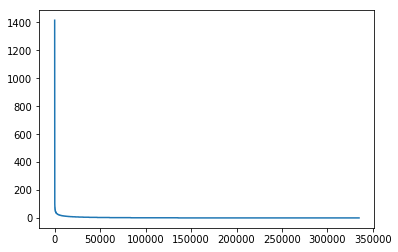

In [9]:
series.plot(use_index = False)

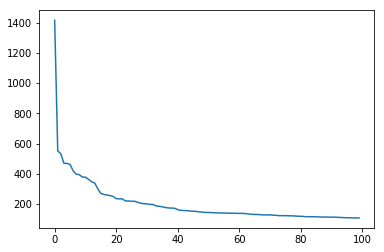

In [10]:
first_n = series.head(100)
first_n.plot(use_index = False)

In [17]:
series.head(10)

94362      1415
317315      552
1347602     533
907136      470
1133519     469
499589      463
1152664     420
1707224     398
1371582     395
80929       379
Name: code_address, dtype: int64

In [16]:
# Hoe knoop je panda's aan elkaar

# Code van https://github.com/KennisnetwerkDataScience/Wifi-punten-in-Leeuwarden/blob/master/Groep%202/test_read.py

# only read in first 150000 rows
df_locatus = pd.read_csv(locatus_file, sep = ';', nrows = 1250000)

# position of each wifi sensor
sensor_positions = pd.read_csv(sensors_file, sep=';', decimal=',')

# join the sensor positions to the wifi data, so the locations are available in the dataframe
df_joined = df_locatus.join(sensor_positions.set_index('sensor_id'), on='VirtualSensorCode')

# count number of passages for each wifi point (not complete at the moment)
print(df_joined.groupby(['VirtualSensorCode']).count().id)


VirtualSensorCode
1074    672160
1078    351104
2054    226736
Name: id, dtype: int64
